In [7]:
import numpy as np
from sklearn.datasets import make_blobs

#creo datos de una sola variable y de dos clases
# cada clase sera un distro, a la que le puedo cambiar el sigma (std) y el mu ( center)

x, y = make_blobs(n_samples=50, centers=np.array([1,3]).reshape(-1, 1), n_features=1,random_state=1,cluster_std=0.8)


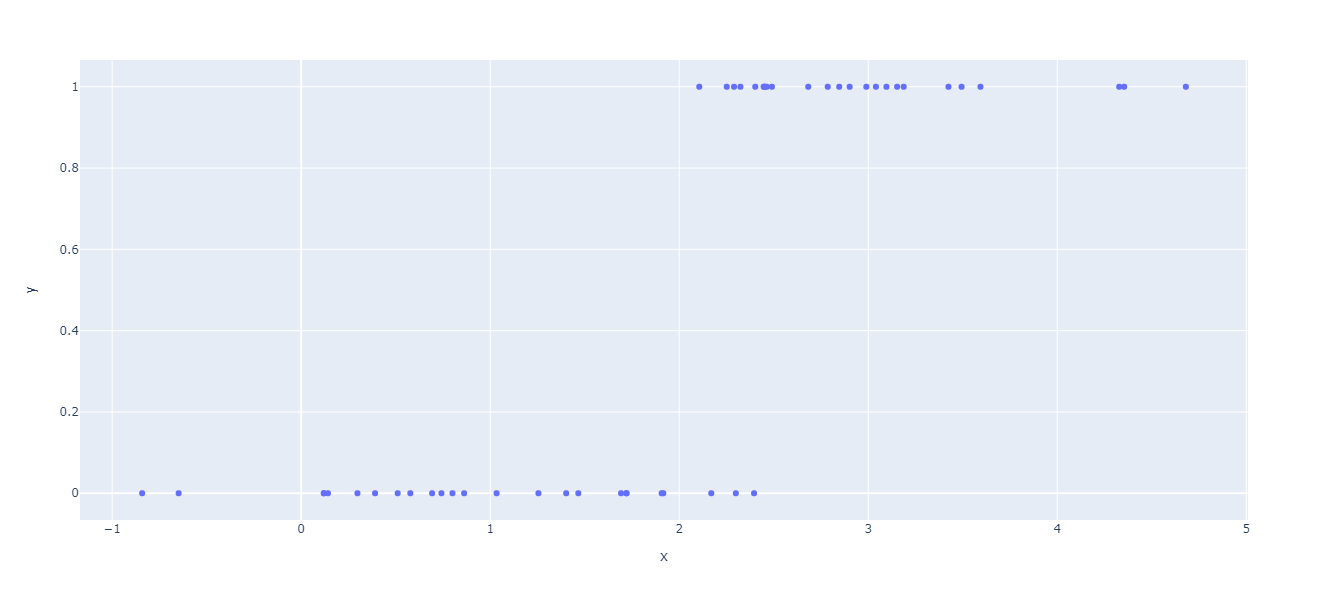

In [9]:
import plotly.express as px
px.scatter(x=x[:,0], y=y, height=600)


In [45]:
# escribo mi modelo, creo una clase y le doy el mismo formato a las clases de SKLEARN
import copy as copy

class logisticreg:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose=verbose
        self.coefs=list()
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    #sigmoide
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #funcion de costo
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # iteracion que busca minizar la funcion de costo haciendo descenso gradiente
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            p=copy.copy(self.theta[:])
            
            self.coefs.append(p)
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
                
    #usa los betas encontrados
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    #usamos el threshold para la clasificacion
    def predict(self, X, threshold=0.5):
        return (self.predict_prob(X) >= threshold).astype(int)
    

def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)


def sig(z):
    return 1 / (1 + np.exp(-z))
    

In [46]:
N=100000

#instanciamos el modelo, creamos una instancia de la clase que acabamos de construir

model = logisticreg(lr=0.01, num_iter=N)

# fiteamos

model.fit(x, y)


In [19]:
betas=model.coefs[::int(N/100)]
sigs=list()


for b in betas:
    sigs.append(sig(np.dot(add_intercept(x),b)))

    
m=list()
for i,c in enumerate(sigs):
    h=np.column_stack([c,x,(i+1)*np.ones(len(c))*int(N/100),['ajuste']*len(c)])
    j=np.column_stack([y,x,(i+1)*np.ones(len(c))*int(N/100),['ground']*len(c)])
    k=np.vstack([h,j])
    m.append(k)
    
import pandas as pd    
df = pd.DataFrame(np.vstack(m),columns=['y','x','i','datos'])    

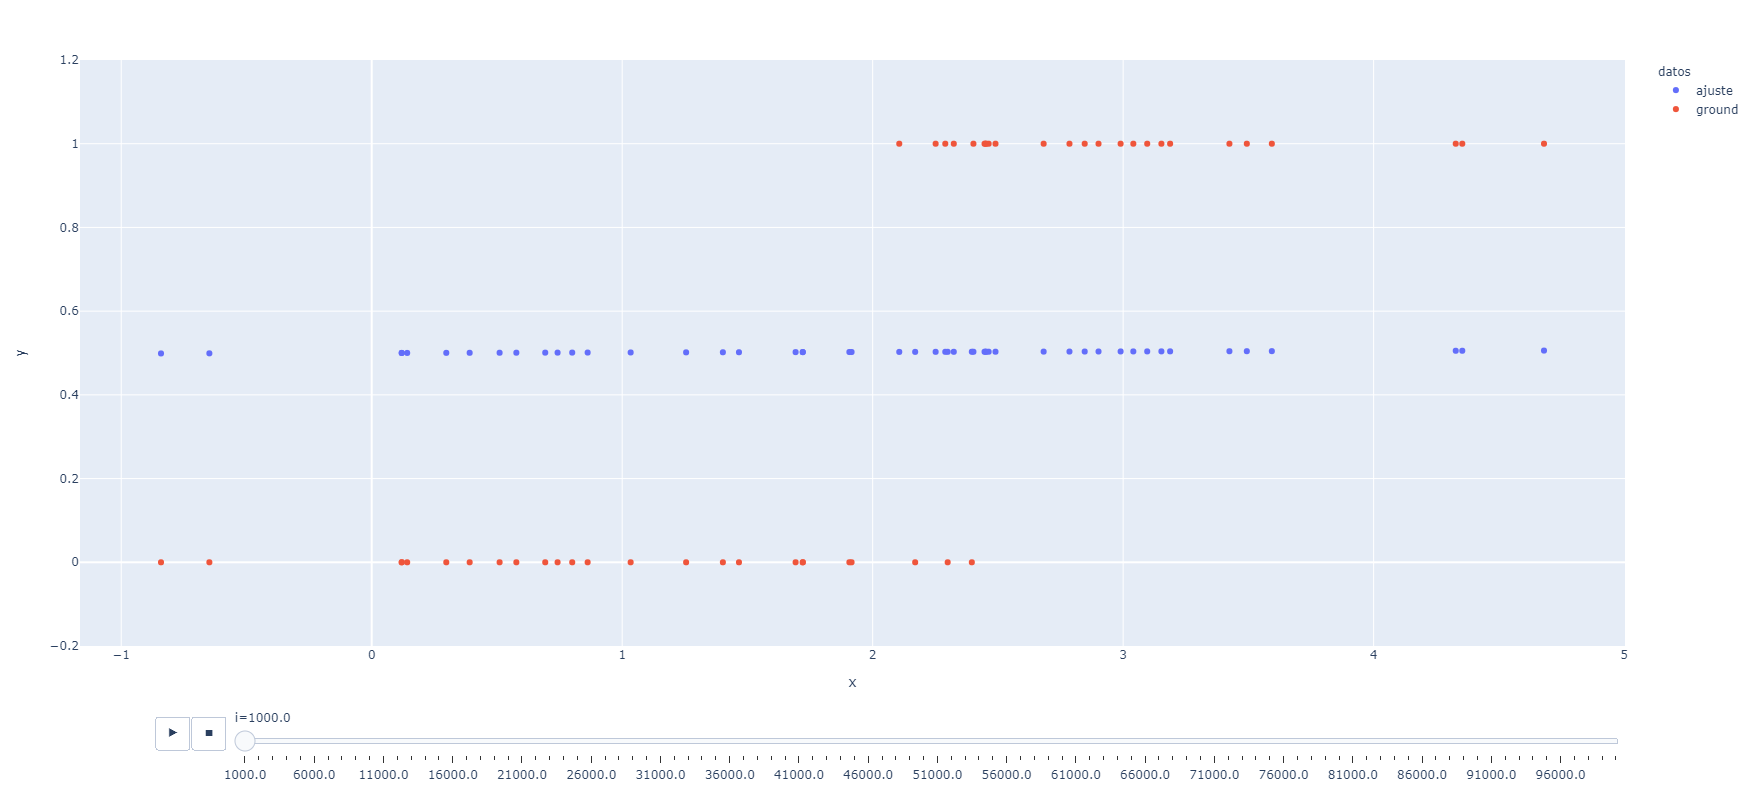

In [20]:
px.scatter(df, x="x", y="y", color='datos', animation_frame="i",range_y=[-0.2,1.2],height=800)


In [21]:
#miro la ultima sigmoide, recordamos que son las probabilidades para cada x

model.predict_prob(x)

array([9.99991292e-01, 2.32825893e-05, 9.57135313e-02, 9.99998669e-01,
       6.41191648e-01, 1.23386565e-07, 9.89204968e-01, 6.86944124e-01,
       9.95441243e-01, 2.07568534e-05, 2.21752007e-01, 1.08320328e-03,
       7.24484697e-01, 9.82836797e-01, 7.94254580e-01, 9.68605444e-01,
       2.29920026e-01, 9.46827679e-01, 7.99795095e-01, 2.37742408e-04,
       9.98924543e-01, 2.64563961e-02, 9.96210315e-01, 7.80397350e-04,
       1.66459053e-04, 8.64699725e-01, 6.97821366e-01, 9.91744134e-01,
       8.46680414e-01, 9.54426207e-02, 8.39641225e-01, 9.77103446e-01,
       5.35100760e-05, 1.89274436e-02, 5.36176959e-01, 9.93845153e-01,
       8.37653001e-01, 2.70149009e-03, 8.31638092e-02, 9.99257215e-01,
       9.99563742e-01, 4.51706543e-01, 8.35032925e-01, 2.06925105e-05,
       9.99992424e-01, 5.71605433e-04, 3.45483703e-07, 8.74476767e-03,
       4.39519932e-04, 8.80041255e-05])

In [22]:
# Comparemos con SKLEARN

In [23]:
from sklearn.linear_model import LogisticRegression
# Instanciamos un objeto de esa clase
lrsk = LogisticRegression()
# Ajustamos esta instancia con los datos de entrenamiento
lrsk.fit(x, y)
#listo!

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lrsk.predict_proba(x)[:,0]

array([0.00342931, 0.99242098, 0.70992332, 0.00141431, 0.39161032,
       0.99935844, 0.09103362, 0.36875162, 0.06230414, 0.99281841,
       0.60516954, 0.95519998, 0.34908107, 0.11116284, 0.30906113,
       0.14348115, 0.59988206, 0.17844147, 0.30561578, 0.97761485,
       0.03243502, 0.8231022 , 0.05737429, 0.96138708, 0.98101958,
       0.26062337, 0.36315177, 0.08098722, 0.27414387, 0.7102282 ,
       0.2791782 , 0.12565252, 0.98881039, 0.84545585, 0.44158825,
       0.07117446, 0.28057756, 0.93258534, 0.72470855, 0.02736919,
       0.02141103, 0.48134615, 0.28240709, 0.99282886, 0.00321159,
       0.96649615, 0.9989568 , 0.88786864, 0.97029393, 0.98588642])

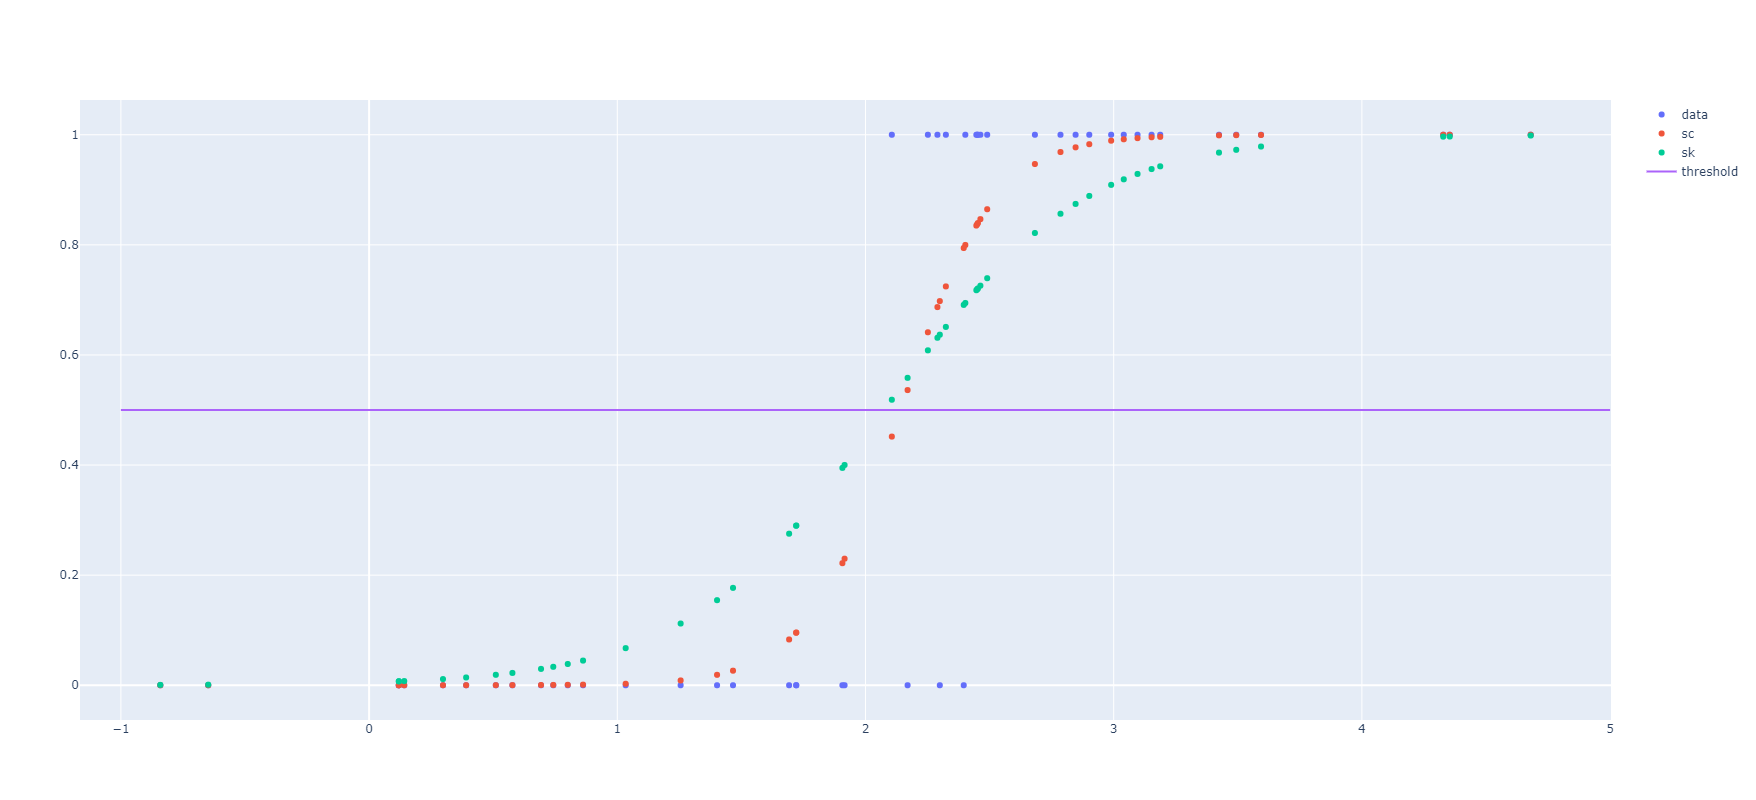

In [34]:
import plotly.graph_objects as go


fig = go.Figure(layout=dict(height=800))
#datos
fig.add_trace(go.Scatter(x=x[:,0], y=y,mode='markers',name='data'))

#ajuste con nuestra clase
fig.add_trace(go.Scatter(x=x[:,0], y=model.predict_prob(x),mode='markers',name='sc'))

#ajuste con sklearn
fig.add_trace(go.Scatter(x=x[:,0], y=lrsk.predict_proba(x)[:,1],mode='markers',name='sk'))

# referencia del threshold para la clasficacion
fig.add_trace(go.Scatter(x=[-1,5],y=[0.5,0.5],mode='lines',name='threshold'))
fig.show()

In [27]:
lrsk.predict(x)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0])

In [28]:
np.unique(lrsk.predict(x), return_counts=True)

(array([0, 1]), array([22, 28], dtype=int64))

In [29]:
model.predict(x,0.5)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0])

In [30]:
np.unique(model.predict(x,0.5), return_counts=True)

(array([0, 1]), array([23, 27], dtype=int64))

In [31]:
np.unique(model.predict(x,0.5), return_counts=True)

(array([0, 1]), array([23, 27], dtype=int64))

In [62]:
def err(y_pred,y):
    x_err=list()
    for i,xe in enumerate(y_pred):
        if xe==y[i]:
            x_err.append(False)
        else:
            x_err.append(True)
    return(x_err)   

In [90]:
x_err1=err(model.predict(x),y)
x_err2=err(lrsk.predict(x),y)

sum(x_err1),sum(x_err2)

(4, 3)

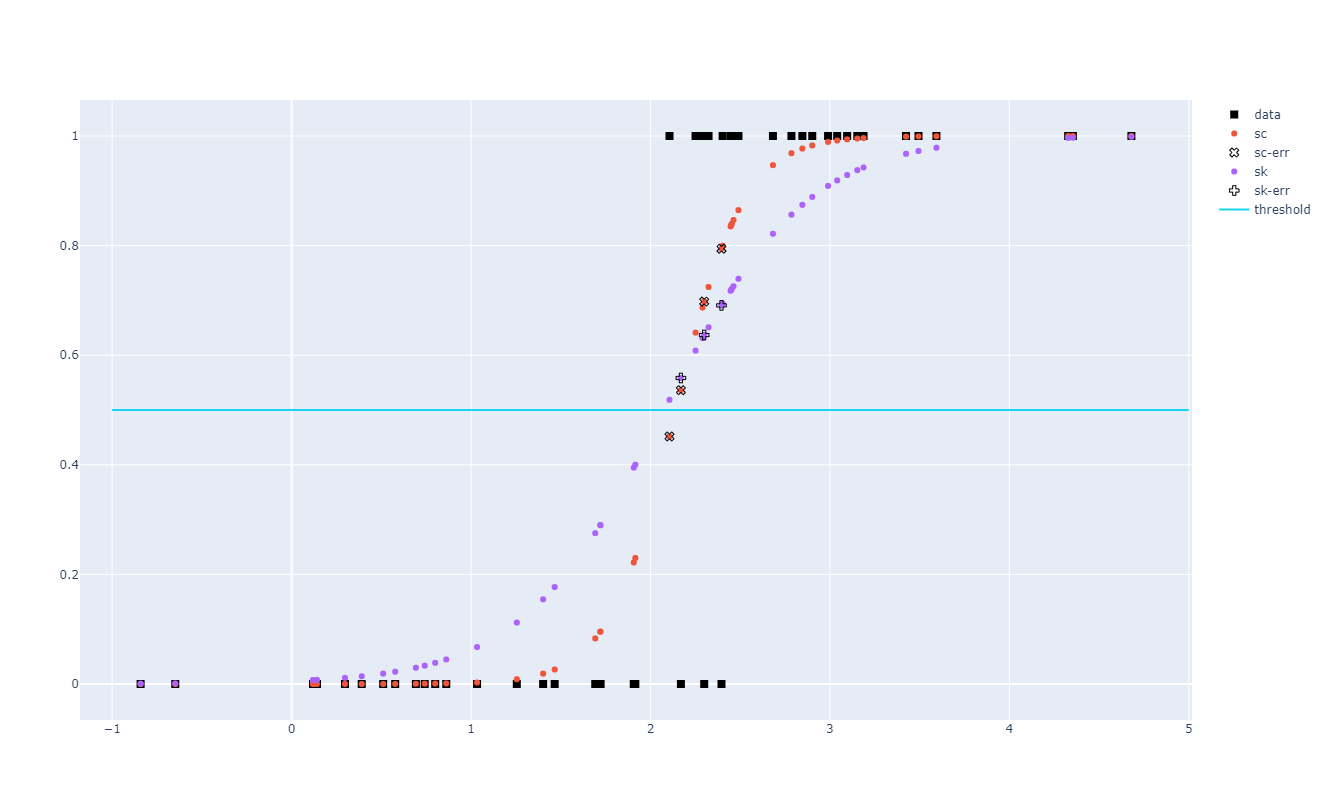

In [91]:
fig = go.Figure(layout=dict(height=800))

fig.add_trace(go.Scatter(x=x[:,0], y=y,mode='markers',marker_symbol='square',name='data',marker=dict(color='Black', size=8)))

fig.add_trace(go.Scatter(x=x[:,0], y=model.predict_prob(x),mode='markers',name='sc'))
fig.add_trace(go.Scatter(x=x[:,0][x_err1], y=model.predict_prob(x)[x_err1],marker_symbol='x',mode='markers',name='sc-err',marker=dict(color='rgba(135, 206, 250, 0)', size=8, line=dict(  color='Black',        width=1  ))))



fig.add_trace(go.Scatter(x=x[:,0], y=lrsk.predict_proba(x)[:,1],mode='markers',name='sk'))
fig.add_trace(go.Scatter(x=x[:,0][x_err2], y=lrsk.predict_proba(x)[:,1][x_err2],marker_symbol='cross',mode='markers',name='sk-err',marker=dict(color='rgba(135, 206, 250,0)', size=8, line=dict(  color='Black',        width=1  ))))

fig.add_trace(go.Scatter(x=[-1,5],y=[0.5,0.5],mode='lines',name='threshold'))
fig.show()

In [103]:
# 3d
x2, y2 = make_blobs(n_samples=50, centers=2, n_features=2,random_state=10,cluster_std=1.8)


In [165]:
x2, y2 = make_blobs(n_samples=100, centers=[[-1,1],[1,-1]], n_features=2,random_state=10,cluster_std=1)


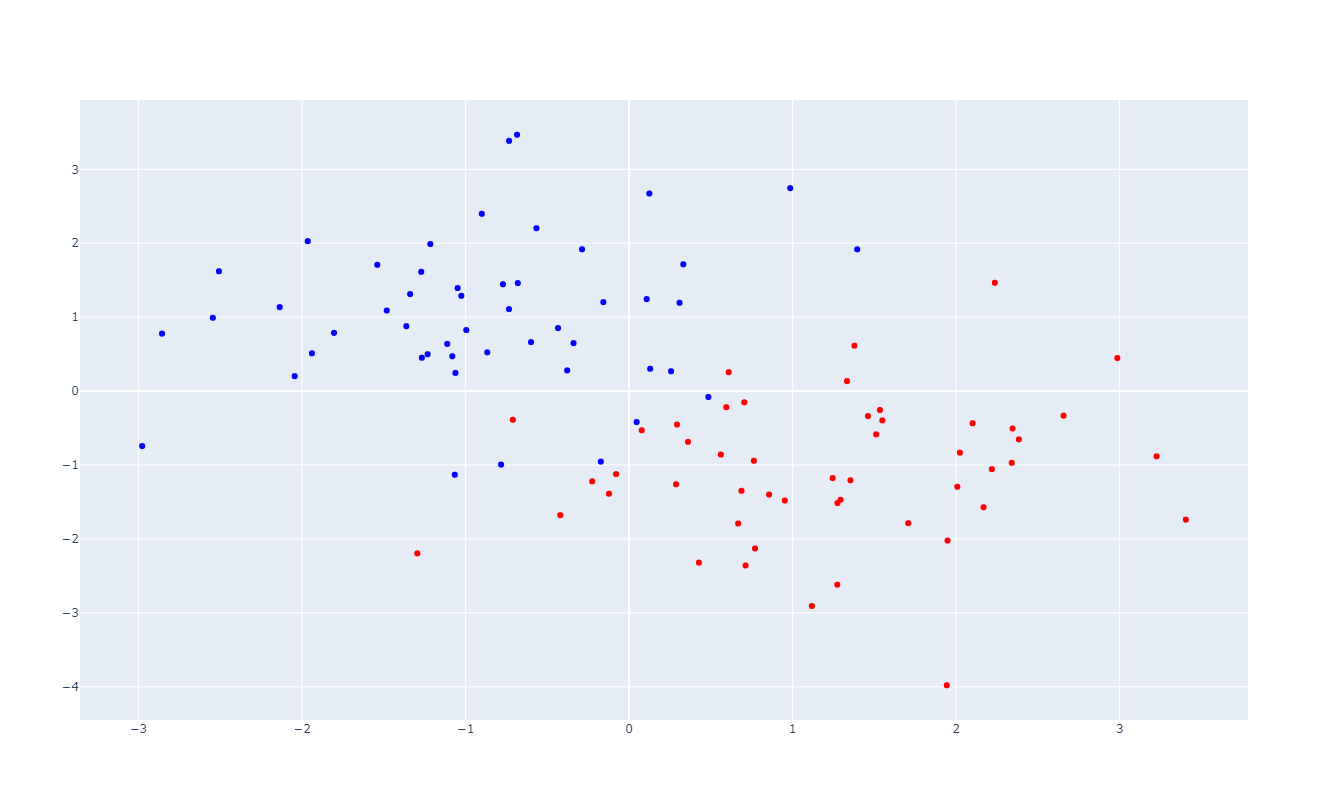

In [166]:
fig = go.Figure(layout=dict(height=800))

fig.add_trace(go.Scatter(x=x2[:,0], y=x2[:,1],marker_color=y2,mode='markers',  marker=dict(colorscale='picnic')))

In [167]:
fig = go.Figure(data=[go.Scatter3d(x=x2[:,0], y=x2[:,1], z=y2, marker=dict(colorscale='picnic',color=y2, size=5),     mode='markers')],layout=dict(height=800))
fig.show()

In [168]:
lrsk2 = LogisticRegression()
# Ajustamos esta instancia con los datos de entrenamiento
lrsk2.fit(x2, y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
lrsk2.predict_proba(x2)[:,0]

array([9.58781882e-01, 2.53262607e-01, 9.93979617e-01, 9.96767953e-02,
       2.35753986e-01, 1.32727150e-01, 9.52490324e-01, 4.81277632e-03,
       9.61103064e-03, 1.27813421e-03, 9.98734047e-01, 9.73877603e-01,
       2.75993113e-03, 3.62178854e-02, 4.73922545e-02, 9.89906907e-01,
       5.44817986e-01, 1.06700625e-03, 6.00309871e-02, 9.48178803e-01,
       7.00038713e-03, 1.21865870e-02, 8.56965495e-04, 9.99715658e-01,
       2.32942497e-01, 4.54226797e-03, 3.43644910e-01, 9.99321641e-01,
       2.98920089e-03, 8.49241233e-04, 9.99687901e-01, 8.89278915e-01,
       8.26739418e-02, 9.98547004e-01, 1.58463818e-02, 9.91590104e-01,
       9.92299576e-01, 6.17896055e-01, 9.81397317e-01, 1.37140782e-01,
       8.10171795e-03, 1.60830119e-02, 9.97394935e-01, 9.95797483e-01,
       9.81194053e-01, 1.58795767e-02, 9.90612574e-01, 2.09143818e-01,
       7.61138202e-01, 6.59602662e-03, 9.92897013e-01, 4.40487138e-01,
       9.98706107e-01, 9.99451617e-01, 9.46782053e-01, 9.69743608e-01,
      

In [170]:
fig = go.Figure(data=[go.Scatter3d(x=x2[:,0], y=x2[:,1], z=y2, marker=dict(colorscale='picnic',color=y2, size=5),     mode='markers')],layout=dict(height=800))
fig.add_trace(go.Scatter3d(x=x2[:,0], y=x2[:,1], z=lrsk2.predict_proba(x2)[:,1],mode='markers',marker=dict(color='rgba(135, 206, 250,1)', size=5,line=dict(color='Black', width=1  ))) )

fig.show()